# Simple Twitter Analysis

By: Atwine Mugume Twinamatsiko

In [1]:
#import the necessary libraries
import tweepy
import json
import time

#let's try to read this data with pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#this will help us to work with the streaming API
import slistener as sl

#consumer key, consumer secret, access token, access secret.
ckey="tLolJ53qD8C7MzxWOynytE7Wr"
csecret="k7XtFldKsnWwY85FAUE1BMrmKFSQT9ZvIsxWLhXdnRmiZ8H2LY"
atoken="2400788581-SqJ2TljEPI7GEKZa67AoDPGUZr3DqEUJ7cBp5Ng"
asecret="tnPy4kKayWeIZt6lN1iCY1C1cnzC7PKrlTSJXAD1iXvIX"

# Instantiating objects of authentication 
auth = tweepy.OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

In [2]:
# Creation of the actual interface, using authentication
api = tweepy.API(auth)

In [ ]:
#run this cell to download data
# from tweepy import Stream

# Set up words to track
keywords_to_track = ['#Covid19UG','#Uganda','#STAYSAFEUG']

# Instantiate the SListener object 
listen = sl.SListener(api)

# Instantiate the Stream object
stream = Stream(auth, listen)

# Begin collecting data
stream.filter(track = keywords_to_track)

# Reading the Data

In [5]:
# Where you put the data of twitter stream
tweets_data_path = 'data.json'

In [3]:
# this function will help us flatten the tweets so that we will be able to get
# the extended tweet versions of the text.
def flatten_tweets(tweets_file):
    """ Flattens out tweet dictionaries so relevant JSON
        is in a top-level dictionary."""
    
    tweets_json = open( tweets_file, "r")
    
    tweets_list = []
    
    # Iterate through each tweet
    for tweet in tweets_json:
        tweet_obj = json.loads(tweet)
    
        # Store the user screen name in 'user-screen_name'
        tweet_obj['user-screen_name'] = tweet_obj['user']['screen_name']
    
        # Check if this is a 140+ character tweet
        if 'extended_tweet' in tweet_obj:
            # Store the extended tweet text in 'extended_tweet-full_text'
            tweet_obj['extended_tweet-full_text'] = tweet_obj['extended_tweet']['full_text']
    
        if 'retweeted_status' in tweet_obj:
            # Store the retweet user screen name in 'retweeted_status-user-screen_name'
            tweet_obj['retweeted_status-user-screen_name'] = tweet_obj['retweeted_status']['user']['screen_name']

            # Store the retweet text in 'retweeted_status-text'
            tweet_obj['retweeted_status-text'] = tweet_obj['retweeted_status']['text']
            
        tweets_list.append(tweet_obj)
    return tweets_list

In [6]:
tweets = flatten_tweets(tweets_data_path)

In [7]:
# Create a DataFrame from `tweets`
ds_tweets = pd.DataFrame(tweets)

# Print out the first 5 tweets from this dataset
print(ds_tweets['text'].values[0:5])

['RT @OleItumbi: UGANDAN President @KagutaMuseveni\nshows the country how to exercise at home in bid to discourage evening walks #StayAtHome #…'
 'RT @nbstv: Ugandan citizen Samuel Kimbowa who fetches water for a living donated UGX5000 to aid the government in the fight against #COVID1…'
 'I hereby challenge Presidents Uhuru, Kagame, Nkurunziza, Kiir and Magufuri to the #WorkoutFromHome challenge East A… https://t.co/rdCrUAPkQ5'
 'RT @KM_thoni: Not only is he coming for daily TV presenters, now fitness influencers need to watch out too.\n\nAnyway, please stay in your ho…'
 '@KagutaMuseveni A President with a personality\nFeeling very inspired to stay home #COVID19UG']


In [27]:
ds_tweets.shape

(885, 40)

In [29]:
ds_tweets[['text']]

,text
0,RT @OleItumbi: UGANDAN President @KagutaMuseve...
1,RT @nbstv: Ugandan citizen Samuel Kimbowa who ...
2,"I hereby challenge Presidents Uhuru, Kagame, N..."
3,RT @KM_thoni: Not only is he coming for daily ...
4,@KagutaMuseveni A President with a personality...
...,...
880,RT @nbstv: Ugandan citizen Samuel Kimbowa who ...
881,RT @AKasingye: Tell Tugume ngu akanyanga. She ...
882,The hairstyle is scary in these trying times 😷😥
883,"RT @newvisionwire: QUOTE OF THE DAY\n\n""God ca..."


In [80]:
#since I have collected some of the data that is general.
#I would like to know how many times the tweet is related to corona
count_corona = ds_tweets['text'].str.contains('#corona', case = False)

#let's find the parcentage
print("The total % corona is talked about is: ",(round(sum(count_corona)/ds_tweets.shape[0]*100)),"%")

The total % corona is talked about is:  2 %


Recall that relevant text may not only be in the main text field of the tweet. It may also be in the `extended_tweet`, the `retweeted_status`, or the `quoted_status`. We need to check all of these fields to make sure we've accounted for all the of the relevant text. We'll do this often so we're going to create a function which does this.

### Function here below.

In [70]:
def check_word_in_tweet(word, data):
    """Checks if a word is in a Twitter dataset's text. 
    Checks text and extended tweet (140+ character tweets) for tweets,
    retweets and quoted tweets.
    Returns a logical pandas Series.
    """
    contains_column = data['text'].str.contains(word, case = False)
    contains_column |= data['extended_tweet-full_text'].str.contains(word, case = False)
    contains_column |= data['extended_tweet'].str.contains(word, case = False) 
     #contains_column |= data['quoted_status-extended_tweet-full_text'].str.contains(word, case = False) 
    contains_column |= data['retweeted_status-text'].str.contains(word, case = False) 
     #contains_column |= data['retweeted_status-extended_tweet-full_text'].str.contains(word, case = False)
    return contains_column

In [82]:
sum(check_word_in_tweet('corona',ds_tweets))/ds_tweets.shape[0]*100 +\
sum(check_word_in_tweet('#corona',ds_tweets))/ds_tweets.shape[0]*100

#this tells us that out of the total 899 tweets only about 10% are related 
#to corona virus, I dont think this could be the case for a country like Italy.


9.830508474576272

In [83]:
# time analysis

In [84]:
ds_tweets.head(1)

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,lang,timestamp_ms,user-screen_name,retweeted_status-user-screen_name,retweeted_status-text,extended_tweet,extended_tweet-full_text,possibly_sensitive,extended_entities,display_text_range
0,Thu Apr 09 15:22:18 +0000 2020,1248270016480448512,1248270016480448512,RT @OleItumbi: UGANDAN President @KagutaMuseve...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,None,...,en,1586445738321,BrianRop17,OleItumbi,UGANDAN President @KagutaMuseveni\nshows the c...,NaN,NaN,NaN,NaN,NaN


In [86]:
#change the date to a datetime variable
ds_tweets['created_at'] = pd.to_datetime(ds_tweets['created_at'])

#change the index of the whole dataset

ds_tweets.set_index('created_at',inplace= True)

In [95]:
#let's resample over a time of 5 minutes
#this means we shall use the resample method on the datetime column
#it will help us count over time the prevalence of the word.

ds_tweets['corona'] = check_word_in_tweet('corona',ds_tweets)

mean_corona = ds_tweets['corona'].resample('10 min').mean()
#we use resample to measure means over the total 5 min windows
#it will show us for every 5 mins when do people talk about corona


In [96]:
#let's have a look.
mean_corona.head(3)

created_at
2020-04-09 15:20:00+00:00    0.085106
2020-04-09 15:30:00+00:00    0.058824
2020-04-09 15:40:00+00:00    0.065217
Freq: 10T, Name: corona, dtype: float64

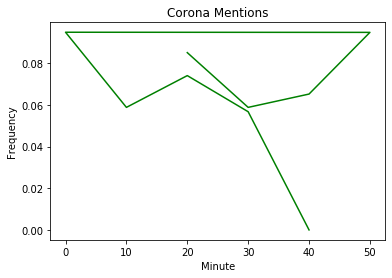

In [97]:
#let's plot the sequence

plt.plot(mean_corona.index.minute, 
    mean_corona, color = 'green')
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.title('Corona Mentions')
plt.show()

### Sentiment Analysis.

In [104]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/amugume/nltk_data...


True

In [105]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = ds_tweets['text'].apply(sid.polarity_scores)

In [123]:
sentiment_scores[:5][0]

created_at
2020-04-09 15:22:18+00:00    {'neg': 0.123, 'neu': 0.877, 'pos': 0.0, 'comp...
2020-04-09 15:22:22+00:00    {'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compou...
2020-04-09 15:22:23+00:00    {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...
2020-04-09 15:22:29+00:00    {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...
2020-04-09 15:22:35+00:00    {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'comp...
Name: text, dtype: object

In [124]:
sentiment = sentiment_scores.apply(lambda x: x['compound'])

In [131]:
# Print out the text of a positive tweet
print(ds_tweets[sentiment > 0.6]['text'].values[0])

print('\n')
# Print out the text of a negative tweet
print(ds_tweets[sentiment < -0.6]['text'].values[0])

# Generate average sentiment scores for #python
sentiment_py = sentiment[ check_word_in_tweet('corona', ds_tweets) ].resample('20 m').mean()

# Generate average sentiment scores for #rstats
sentiment_r = sentiment[ check_word_in_tweet('corona', ds_tweets) ].resample('20 m').mean()

@KagutaMuseveni A President with a personality
Feeling very inspired to stay home #COVID19UG


RT @ntvuganda: JUST IN: @PoliceUg in Kireka has impounded a @MinofHealthUG van for violating the emergency health guidelines specifically s…


In [135]:
#this will change when we have more data.
sentiment_py

created_at
2020-04-30 00:00:00+00:00   -0.075342
Freq: 20M, Name: text, dtype: float64

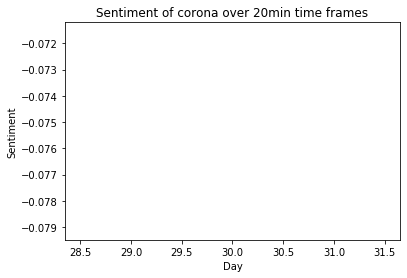

In [134]:
# Plot average #python sentiment per day
plt.plot(sentiment_py.index.day, sentiment_py, color = 'green')

plt.xlabel('Day')
plt.ylabel('Sentiment')
plt.title('Sentiment of corona over 20min time frames')
plt.show()

### Trying to collect historical data

In [ ]:
# Initializing a listener class that streams Twitter status
class StdOutListener(tweepy.StreamListener):
#     Create an init statement
    def __init__(self, start_time, time_limit=100):
        self.time = start_time
        self.limit = time_limit
        self.tweet_data = []
    
#     Defining what you are going to do based on data
    def on_data(self, data):
        try:
#             Opening data for streaming
            with open('output.json', 'a') as f:
                f.write(data)
                return True
        except KeyboardInterrupt:
            print("Twitter Download is interrupted")
        except BaseException as e:
            print(str(e))
        return True

    def on_error(self, status):
        print (status)

In [ ]:
#This handles Twitter authetification and the connection to Twitter Streaming API
keywords_to_track = ['#Covid19UG','#Uganda','#STAYSAFEUG']
start_time = time.strptime("7 Apr 20", "%d %b %y")    
l = StdOutListener(start_time)
strm = tweepy.Stream(auth, l)
# Begin collecting data
strm.filter(track = keywords_to_track)

### Other things I tried

In [3]:


# tweets_data_path = 'dataset/US_election_data.txt'
tweets_data = []
tweets_file = open(tweets_data_path, "r")

for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

# Printing the length of the tweets data
print (len(tweets_data))

885


In [17]:
#I just want to have a look at some of the variables kept in the dictionaries
#form there I can see what to pull out of the data.
#we managed to download 885 tweets.
tweets_data[:1]

[{'created_at': 'Thu Apr 09 15:22:18 +0000 2020',
  'id': 1248270016480448512,
  'id_str': '1248270016480448512',
  'text': 'RT @OleItumbi: UGANDAN President @KagutaMuseveni\nshows the country how to exercise at home in bid to discourage evening walks #StayAtHome #…',
  'source': '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>',
  'truncated': False,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 743339255087259648,
   'id_str': '743339255087259648',
   'name': 'Brian',
   'screen_name': 'BrianRop17',
   'location': None,
   'url': None,
   'description': None,
   'translator_type': 'none',
   'protected': False,
   'verified': False,
   'followers_count': 174,
   'friends_count': 328,
   'listed_count': 0,
   'favourites_count': 1516,
   'statuses_count': 1903,
   'created_at': 'Thu Jun 16 07:07:43 +0000 2016',
   'utc_of

In [18]:
from datetime import datetime

errors = []
def gettext(tweet,element):
    try:
        return tweet[element]
    except KeyError:
        errors.append(tweet)
        pass

# Getting the data and texts along the ways using gettext
tweets = pd.DataFrame()
tweets['text'] = [gettext(tweet,'text') for tweet in tweets_data]
tweets['lang'] = [gettext(tweet,'lang') for tweet in tweets_data]
#tweets['user'] = [gettext(tweet,'user') for tweet in tweets_data]
tweets['created_at'] = [gettext(tweet,'created_at') for tweet in tweets_data]
tweets['created_at'] = pd.to_datetime(tweets['created_at'],errors='ignore')
tweets.set_index('created_at',inplace=True)

In [20]:
tweets.shape

(885, 2)